In [112]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [63]:
df=pd.read_csv('sl.csv')
print(df.shape)
df.head()

(306197, 4)


,title,show,click,ctr
0,《香蜜》幕后照：邓伦杨紫深情对视，润玉片场耍帅！,2251,501,22.256775
1,他演两次“傻子”摘得视帝，如今娶西游记中红孩儿，儿女双全,5559,1324,23.817233
2,修路挖出2.4米长冬眠缅甸蟒 胆大村民将蟒蛇抱回村,1471,251,17.063222
3,妈妈曾撮合她和邓超处对象，她却执意嫁煤老板，结婚1年就离婚,1544,344,22.279793
4,新年新气象！陈坤唐嫣周冬雨热巴等群星花式拜年,1151,111,9.643788


In [16]:
df.sort_values(by=['show'],ascending=False,inplace=True)
df2= df[df.ctr<20]
df2.sort_values(by=['ctr'],ascending=False,inplace=True)
print(df2.shape)
df2.head(100)

(244923, 4)


,title,show,click,ctr
252098,世界上最难暗杀的三个人，一中国人上榜，其中一人经历638次暗,11206,2241,19.998215
76061,外国游客疑惑：三峡大坝落差113米，船是怎么通过的？,10286,2057,19.998056
108987,真是谈癌色变，又一位明星得了癌症晚期，希望能够开心快乐每一天,9586,1917,19.997914
169457,杨紫给林志玲擦嘴，却忍不住偷亲，林志玲的举动瞬间暴露人品,8201,1640,19.997561
239295,41岁李玉刚全家照，生活中是纯爷们，帅气像父亲，女儿很惊艳,6766,1353,19.997044
226397,这个淘气的小女孩，原来就是她的女儿，圈外老公足足追了她10年,20048,4009,19.997007
52158,幽默笑话:一富婆被绑架，5绑匪打电话给她老公，要3000万赎,6231,1246,19.996790
30859,23岁单身男子，查出肝癌离世，医生叹气：这种“筷子”，最好别用,22369,4473,19.996424
182357,男人若是长期不排精，身体会有哪些改变？看完或许会害羞！,11127,2225,19.996405
225142,王俊凯客串《都挺好》，虽然镜头只有1秒，但看见他粉丝就很高兴,5541,1108,19.996391


In [8]:
df = df[df.title.apply(lambda x: len(str(x))>5)]
df.sort_values(by=['ctr'],ascending=False,inplace=True)
df.query('show > 1000').head(20)

,title,show,click,ctr
77782,林黛玉不过是替身，这个人才是宝玉真爱，曹雪芹早就言明二人有染,1153,656,56.895056
144254,当前值得入手的四款旗舰手机，无刘海无水滴，价格厚道,1136,638,56.161972
223491,它是国产手机拍摄水准的标杆，优秀的性能让人爱不释手,1144,641,56.031469
281307,雷军继续放狠招，红米新旗舰命名X20pro，参数基本被确定,1153,633,54.900260
132285,搞笑段子：每次和老婆顶嘴，最后都要被罚跪！,1124,611,54.359431
74901,买手机别盲目跟风，三款高性价比的实用型手机，你看上了谁？,1190,646,54.285714
31697,中国科技芯片出现黑马，这个让华为都有点害怕的存在，你知道吗？,1072,576,53.731343
90059,每日一笑：开什么远光灯，没看我们正撒尿吗？,1063,571,53.715898
96241,每日一笑：谢谢你一踹之恩啊，估计把当年生我的劲都用上了吧？,1092,585,53.571429
98941,《红楼梦》中的潇湘妃子林黛玉最终结局一直成谜，真相原来是这样,1489,796,53.458697


In [9]:
df[df.title=='秘制卤肉配方来袭，鲜香入味还不腻，越吃越香，超级解馋']

,title,show,click,ctr
133537,秘制卤肉配方来袭，鲜香入味还不腻，越吃越香，超级解馋,1107,289,26.106594


In [10]:
df.describe()

,show,click,ctr
count,3.059620e+05,305962.000000,305962.000000
mean,7.009093e+03,878.349681,14.849834
std,2.880266e+04,2559.632234,6.682692
min,1.001000e+03,1.000000,0.014364
25%,1.426000e+03,194.000000,10.954004
50%,2.339000e+03,347.000000,15.024410
75%,5.216000e+03,778.000000,18.966974
max,2.083102e+06,114778.000000,56.895056


In [25]:
neg= df[df.ctr < 15]
neg.shape

(152424, 4)

In [26]:
pos= df[df.ctr > 20]
pos.shape

(60930, 4)

In [260]:
mid =  df.query('ctr>16 and ctr<30')
mid.shape

(189548, 4)

In [23]:
neg.head(20)

,title,show,click,ctr
186194,国产手机排行榜，目前什么国产手机好？,2083102,114778,5.509956
172627,东风本田两新车正式上市售价12.99万起,1263869,80753,6.389349
99006,一台全自动洗车机价格多少钱,950316,27874,2.933130
257805,【反诈进行时】岁月并不如歌，轻信网友遭诈骗,945775,15986,1.690254
91470,贵州不得不去的十大景点,869954,36743,4.223557
110694,"5亿的翡翠原石,大家来看看切料过程",858616,39239,4.570029
303202,怎样可以一天内赚一千块钱,828367,24809,2.994929
44011,买个住人的集装箱大概需要多少钱,817947,30109,3.681045
270636,便宜又好用 6款500左右的智能手机推荐,790083,29731,3.763022
144212,"张家界大峡谷玻璃桥,史无前例的壮观",783994,35020,4.466871


In [24]:
pos.sort_values(by=['show'],ascending=False,inplace=True)
pos.head(20)

,title,show,click,ctr
277760,女子在身上画了一件旗袍，“公然”考验路人的眼力，却无人能辩！,264017,64545,24.447289
56906,冰冻500年的少女，仍身体丰满宛如睡着，专家从她头发揭秘死因,249815,53605,21.457879
223866,张柏芝哭着说出儿子亲生父亲，总算还张柏芝清白了,233933,47762,20.416957
37075,71岁侯耀华陪女徒弟共度四天四夜，儿子发文怒骂垃圾，望洁身自好,213204,43673,20.484137
105968,刘德华病情已经确诊，比预料还要严重，剩下7场演唱会全部取消！,202921,43127,21.253098
265691,她11岁被导演看中，和著名导演同居多年，如今复出却没人关注,200381,46455,23.183336
302471,她与丈夫差23岁，丈夫临终前用一部戏将其捧红，今已守寡5年,196790,40068,20.360791
49715,“老公”称呼已经过时，听听关晓彤怎么叫鹿晗的，网友：太甜了！,184642,37125,20.106476
115262,继李咏和姚贝娜后，又一位明星也抗癌失败，最后愿望是想活到7月,182874,40330,22.053436
224600,李连杰4个女儿私照曝光，差距不是一般的大，黄秋燕女儿完胜利智,177424,37751,21.277279


In [27]:
neg['label'] = 0
pos['label'] = 1

In [30]:
n= neg[['title','label']]
p= pos[['title','label']]
res= pd.concat([n,p]).reset_index(drop=True)
print(res.shape)
res.head()


(213354, 2)


,title,label
0,国产手机排行榜，目前什么国产手机好？,0
1,东风本田两新车正式上市售价12.99万起,0
2,一台全自动洗车机价格多少钱,0
3,【反诈进行时】岁月并不如歌，轻信网友遭诈骗,0
4,贵州不得不去的十大景点,0


In [34]:
# save to CSV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

res = shuffle(res)

tr,te= train_test_split(res, test_size=0.1)
print(tr.shape)
print(te.shape)
tr.reset_index(drop=True,inplace=True)
te.reset_index(drop=True,inplace=True)
tr.to_csv('train.csv',header=False)
te.to_csv('eval.csv',header=False)
# df[['title','label']].to_csv('bert_shuffle.csv')

(192018, 2)
(21336, 2)


# Load bert result

In [135]:
df_raw=pd.read_csv('predict_raw.csv',header=None)
df_raw.columns = ['title','label']
print(df_raw.shape)

(20816, 2)


In [133]:
df_res=pd.read_csv('./output/test_results.csv',header=None)
df_res.columns = ['prob1','prob2']
df_res.shape

(20816, 2)

In [134]:
df_res.head()
df_res.shape

(20816, 2)

In [136]:
t=df_res.values.tolist()

df_raw['prob']=t
df_raw['pre_label']= np.argmax(t, axis=1)
df_raw['confident']= [x[1] for x in t]

# convert A as 1, B,C as 0 
# df_raw.label[df_raw.label!=2]=0
# df_raw.label[df_raw.label==2]=1

# df_raw.pre_label[df_raw.pre_label!=2]=0
# df_raw.pre_label[df_raw.pre_label==2]=1

# df_raw[df_raw.pre_label==1].head(20)
# # convert pos as 1, neg as 0
# df_raw.label[df_raw.label!=0]=3
# df_raw.label[df_raw.label==0]=1
# df_raw.label[df_raw.label==3]=0

# df_raw.pre_label[df_raw.pre_label!=0]=3
# df_raw.pre_label[df_raw.pre_label==0]=1
# df_raw.pre_label[df_raw.pre_label==3]=0

In [137]:
df_raw.query('confident>0.7').head(20)

,title,label,prob,pre_label,confident
35,爆笑GIF图：妹子平衡力真的好 ！,1,"[0.2945455, 0.70545447]",1,0.705454
38,刘涛和他交往数年，却闪婚嫁京城四少，而他却单身至今！,1,"[0.29836008, 0.70163995]",1,0.701640
63,蓬佩奥要慌了，刚到新德里，印度13亿人沸腾了：上万民众上街讨,1,"[0.2899846, 0.71001536]",1,0.710015
97,春天到了，这3种水果最好少给孩子吃，对孩子健康发育有好处！,1,"[0.28319520000000004, 0.71680486]",1,0.716805
135,49岁天后王菲近照曝光，网友:真心不理解谢霆锋的选择,1,"[0.28555185, 0.71444815]",1,0.714448
190,揭秘：光绪帝到底是正常去世，还是意外去世？专家终于给出了答案,0,"[0.29142553, 0.7085744]",1,0.708574
198,任达华被袭击，吴若甫遭绑架，明星光鲜背后的危险一言难尽,0,"[0.29290479999999997, 0.7070951999999999]",1,0.707095
214,为照顾父亲息影7年，奉子成婚两年后离婚，如今却依然与前妻同居,1,"[0.29451314, 0.70548683]",1,0.705487
238,两任妻子都很美，今一个独自养大15岁女儿，一个靠轮椅度过余生,0,"[0.29116290000000006, 0.7088371]",1,0.708837
253,刘备一生错过的四大顶尖人才，个个能力超群，第四位堪比诸葛亮,1,"[0.27973753, 0.72026247]",1,0.720262


In [138]:
df_raw.query('confident<0.3').head(20)

,title,label,prob,pre_label,confident
0,西瓜也分公母? 母的西瓜才好吃，教你如何挑最甜的西瓜！,0,"[0.73167264, 0.26832733]",0,0.268327
2,英国女子跑马腿疼退赛，第四次上医院才查出骨折，最后倒在手术台,0,"[0.95041305, 0.049586955]",0,0.049587
4,苏州交响乐团演奏的歌剧《拉贝日记》在德国上演,0,"[0.8502373, 0.14976272]",0,0.149763
5,刚出生三天的宝宝就会爬行？这动作把婆婆看乐了，儿媳也自豪,0,"[0.72389126, 0.27610877]",0,0.276109
9,百度发布官方公告百度浏览器端将不再更新 别急还有手机移动端,0,"[0.9340506, 0.06594939999999999]",0,0.065949
13,男孩“套路”交警下一秒撒腿就跑 真相令人感动,0,"[0.95281154, 0.047188513]",0,0.047189
15,很划算！这些CPU其实并不贵！,0,"[0.9361709, 0.06382913]",0,0.063829
19,与银行发生深度关系，要注意哪些点？,0,"[0.9455575999999999, 0.054442375999999994]",0,0.054442
20,每天做俯卧撑、深蹲、划船各100个，跑1英里，25天后会怎样,0,"[0.86448205, 0.1355179]",0,0.135518
23,戛纳电影节群星璀璨：莱昂纳多，皮特首次同框，朱一龙步伐太快？,0,"[0.78762025, 0.21237975]",0,0.212380


In [139]:
df_tp= df_raw[(df_raw.label==1) & (df_raw.pre_label==1)]
df_tn= df_raw[(df_raw.label==0) & (df_raw.pre_label==0)]
df_fp= df_raw[(df_raw.label==0) & (df_raw.pre_label==1)]
df_fn= df_raw[(df_raw.label==1) & (df_raw.pre_label==0)]
tp = df_tp.shape[0]
tn = df_tn.shape[0]
fp = df_fp.shape[0]
fn = df_fn.shape[0]
n =df_raw.shape[0]

In [140]:
print('tp=',tp)
print('tn=',tn)
print('fp=',fp)
print('fn=',fn)
print('n=',n)
accuracy = (tp+tn)/n
precision = tp / (tp+fp)
recall = tp / (tp+fn)
F1 = (2*precision*recall) / (precision+recall)

tpr = tp / (tp+fn)
fpr = fp / (fp+tn)
print('accuracy =',accuracy)
print('precision =',precision)
print('recall =',recall)
print('F1 score =',F1)
print('tpr =',tpr)
print('fpr =',fpr)
from sklearn import metrics
y=df_raw.label.values
pred= df_raw.confident.values
fpr, tpr, thresholds = metrics.roc_curve(y_true=y, y_score=pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print('auc=', roc_auc)

tp= 3615
tn= 12638
fp= 2222
fn= 2341
n= 20816
accuracy = 0.780793620292083
precision = 0.6193249957169779
recall = 0.6069509738079247
F1 score = 0.6130755532943271
tpr = 0.6069509738079247
fpr = 0.14952893674293405
auc= 0.8243799527626101


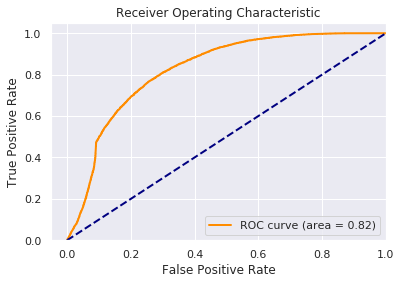

In [141]:
plt.figure()
linewidth = 2
plt.plot(fpr, tpr, color='darkorange',lw=linewidth, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

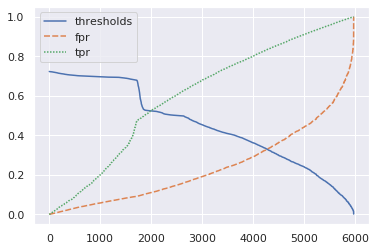

In [142]:
# red dashes, blue squares and green triangles
thresholds= np.array(thresholds.tolist()[1:])
fpr= np.array(fpr.tolist()[1:])
tpr =np.array(tpr.tolist()[1:])

d = {'thresholds': thresholds,'fpr':fpr,'tpr':tpr}
df_roc = pd.DataFrame(data=d)
fig, ax = plt.subplots()
sns.lineplot(data=df_roc)

# idx= range(len(thresholds))
# plt.plot(idx, thresholds, 'g--',idx, tpr, 'r--', idx, fpr, 'b--')
# plt.show()
# sns.lineplot(x="idx", y="fpr",ax= ax,data=df_roc,label='fpr')
# sns.lineplot(x="idx", y="tpr",ax= ax,data=df_roc,label='tpr')
# sns.lineplot(x="idx", y="thresholds",ax= ax,data=df_roc,label='thresholds')